In [32]:
# 1. Import and preprocess the dataset
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('seattle-weather.csv')

# Convert date to datetime and extract year and month
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [34]:
#checking for missing values
print(df.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
year             0
month            0
dtype: int64


In [35]:
# Convert weather to numerical values (one-hot encoding)
weather_dummies = pd.get_dummies(df['weather'], prefix='weather')
df = pd.concat([df, weather_dummies], axis=1)


In [36]:
df.head(5)

,date,precipitation,temp_max,temp_min,wind,weather,year,month,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,True,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,False,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,False,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,False,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,False,False,True,False,False


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1461 non-null   datetime64[ns]
 1   precipitation    1461 non-null   float64       
 2   temp_max         1461 non-null   float64       
 3   temp_min         1461 non-null   float64       
 4   wind             1461 non-null   float64       
 5   weather          1461 non-null   object        
 6   year             1461 non-null   int32         
 7   month            1461 non-null   int32         
 8   weather_drizzle  1461 non-null   bool          
 9   weather_fog      1461 non-null   bool          
 10  weather_rain     1461 non-null   bool          
 11  weather_snow     1461 non-null   bool          
 12  weather_sun      1461 non-null   bool          
dtypes: bool(5), datetime64[ns](1), float64(4), int32(2), object(1)
memory usage: 87.2+ KB
None


In [38]:
# Select features and target
features = ['precipitation', 'temp_min', 'wind', 'year', 'month'] + list(weather_dummies.columns)
X = df[features]
y = df['temp_max']  # Predicting maximum temperature

In [39]:
# 2. Split data into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 10)
X_test shape: (293, 10)
y_train shape: (1168,)
y_test shape: (293,)


In [40]:
# 3. Fit Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
# 4. Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 2.33
Mean Squared Error (MSE): 8.24
R-squared (R²): 0.86


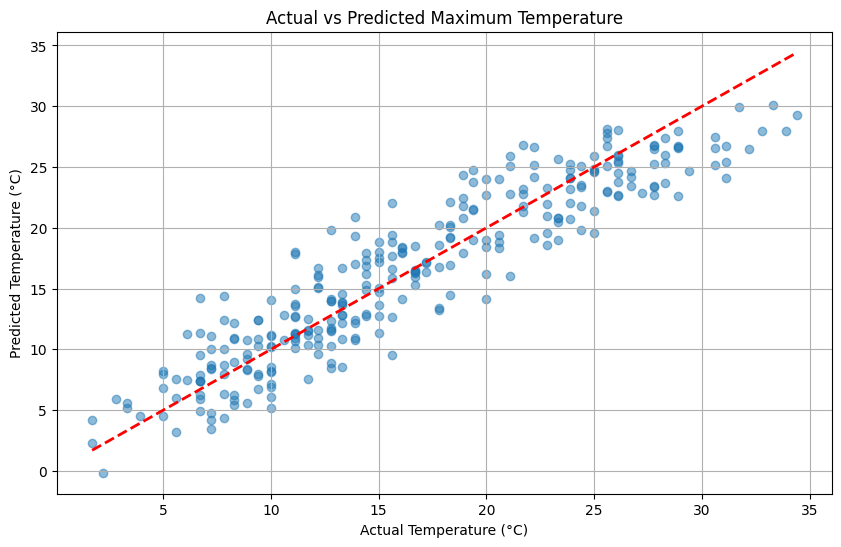

In [42]:
# 5. Plot regression line and interpret coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Maximum Temperature')
plt.grid(True)
plt.show() 


In [43]:
# Print coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")



Feature Coefficients:
precipitation: -0.0452
temp_min: 1.2280
wind: -0.1088
year: -0.0521
month: -0.0879
weather_drizzle: 0.7420
weather_fog: 0.4623
weather_rain: -2.0071
weather_snow: -1.0122
weather_sun: 1.8150
Intercept: 112.3655


In [44]:
# Print coefficients in a simple way
print("\nHow Weather Factors Affect Temperature:")
print("----------------------------------------")
print("1. Rain Effect:")
print(f"   More rain = Temperature goes {'up' if model.coef_[0] > 0 else 'down'} by {abs(model.coef_[0]):.2f}°C per 1mm rain")

print("\n2. Minimum Temperature Effect:")
print(f"   Higher minimum temp = Maximum temp goes up by {model.coef_[1]:.2f}°C per 1°C increase")

print("\n3. Wind Effect:")
print(f"   More wind = Temperature goes {'up' if model.coef_[2] > 0 else 'down'} by {abs(model.coef_[2]):.2f}°C per 1 m/s")

print("\n4. Year Effect:")
print(f"   Each year = Temperature goes {'up' if model.coef_[3] > 0 else 'down'} by {abs(model.coef_[3]):.2f}°C")

print("\n5. Month Effect:")
print(f"   Each month = Temperature goes {'up' if model.coef_[4] > 0 else 'down'} by {abs(model.coef_[4]):.2f}°C")

print("\nBase Temperature (when all factors are zero):")
print(f"   Starting temperature: {model.intercept_:.2f}°C") 


How Weather Factors Affect Temperature:
----------------------------------------
1. Rain Effect:
   More rain = Temperature goes down by 0.05°C per 1mm rain

2. Minimum Temperature Effect:
   Higher minimum temp = Maximum temp goes up by 1.23°C per 1°C increase

3. Wind Effect:
   More wind = Temperature goes down by 0.11°C per 1 m/s

4. Year Effect:
   Each year = Temperature goes down by 0.05°C

5. Month Effect:
   Each month = Temperature goes down by 0.09°C

Base Temperature (when all factors are zero):
   Starting temperature: 112.37°C
